# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Splinter browser not working. Trying with GET request.

# URL of the webpage
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content with Beautiful Soup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table
    table = soup.find('table', class_="table")
    
    # Check if the table is found
    if table:
        # Extract all rows of data
        rows = table.find_all('tr')
        
        # Iterate through the rows
        for row in rows:
            # Find all cells in the row
            cells = row.find_all(['th', 'td'])
            
            # Extract text from cells and print
            row_data = [cell.text.strip() for cell in cells]
            print(row_data)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Read in HTML tables into a DataFrame
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
mars_df = df[0]

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df.columns= ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Remove the first row from the DataFrame
mars_df = mars_df.iloc[1:]

In [8]:
# Confirm DataFrame was created successfully
mars_df

id terrestrial_date   sol   ls  month  min_temp  pressure
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
5       57       2012-08-21    15  158      6     -78.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1866 rows x 7 columns]

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print (mars_df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [35]:
# Change data types for data analysis
# Convert the terrectrial date object into a datetime object
mars_df.loc[:,'terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [36]:
# Convert the id object from an integer to a string
mars_df.loc[:,'id'] = mars_df['id'].astype(str)

In [37]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
#How many months are there on Mars? Calculate total number of unique month values.
months_unique = mars_df['month'].nunique() 
print(f"Count of months on Mars: {months_unique}")

Count of months on Mars: 12


In [14]:
# How many Martian days' worth of data are there?
sol_count = mars_df['sol'].max()
print(f"Total number of elapsed sols in this dataset: {sol_count}")

Total number of elapsed sols in this dataset: 1977


In [15]:
# What is the average low temperature by month?
avg_low_temp = mars_df.groupby('month')['min_temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.301370
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

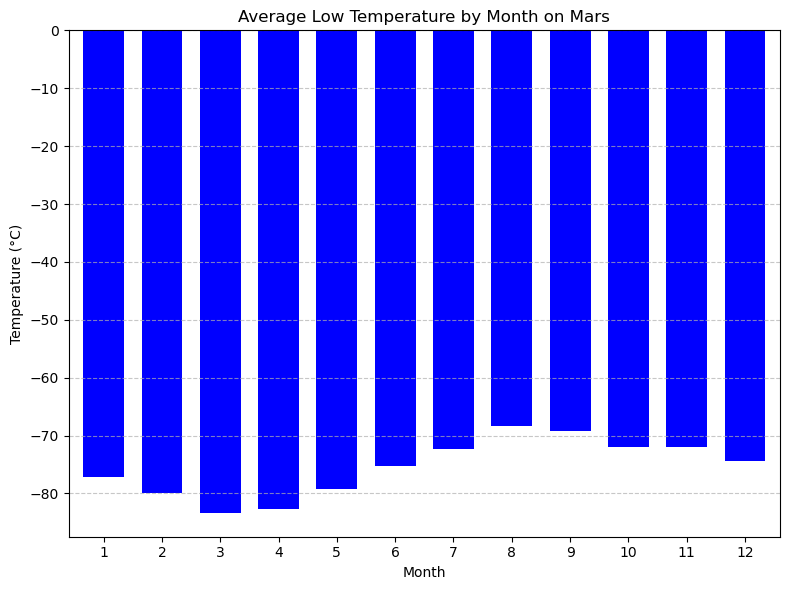

In [46]:
# Plot the average temperature by month in a bar chart to answer the question: 
# What are the coldest and the warmest months on Mars?
avg_low_temp.plot(kind = 'bar', color = 'b', figsize = (8,6), width = 0.7)
plt.title('Average Low Temperature by Month on Mars')
plt.xlabel('Month')
plt.xticks(rotation = 0)
plt.ylabel('Temperature (°C)')
plt.grid(axis='y', linestyle= '--', alpha= 0.7)
plt.tight_layout()
plt.show()

### The coldest month is month 3. The warmest month is month 8. ###

In [17]:
# Average pressure by Martian month
avg_daily_pressure = mars_df.groupby('month')['pressure'].mean()
avg_daily_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.095890
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

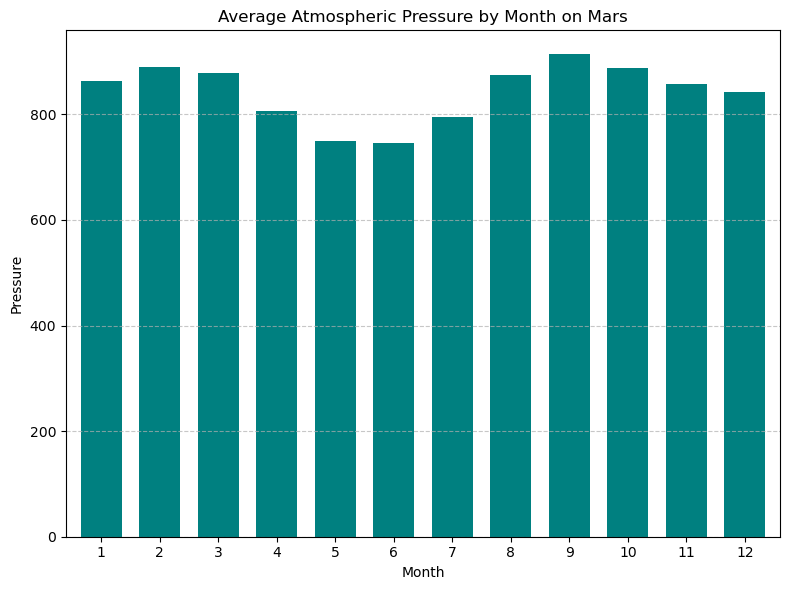

In [18]:
# Plot the average pressure by month
avg_daily_pressure.plot(kind = 'bar', color = 'teal', figsize = (8,6), width = 0.7)
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.xticks(rotation = 0)
plt.ylabel('Pressure')
plt.grid(axis='y', linestyle= '--', alpha= 0.7)
plt.tight_layout()
plt.show()

### Atmospheric pressure is lowest in month 6 and highest in month 9, on average. ###

In [23]:
earliest_date = mars_df.loc[mars_df['terrestrial_date'].idxmin()]
earliest_date

id                                   13
terrestrial_date    2012-08-17 00:00:00
sol                                  11
ls                                  156
month                                 6
min_temp                          -76.0
pressure                          740.0
Name: 1, dtype: object

In [24]:
latest_date = mars_df.loc[mars_df['terrestrial_date'].idxmax()]
latest_date

id                                 1895
terrestrial_date    2018-02-27 00:00:00
sol                                1977
ls                                  135
month                                 5
min_temp                          -77.0
pressure                          727.0
Name: 1866, dtype: object

In [80]:
# Find the row with the lowest minimum temperature value
min_temp_row = mars_df.loc[mars_df['min_temp'].idxmin()]

# Find the row with the highest minimum temperature value
max_temp_row = mars_df.loc[mars_df['min_temp'].idxmax()]

# Extract the terrestrial dates corresponding to the lowest and highest minimum temperature values
min_temp_date = min_temp_row['terrestrial_date']
max_temp_date = max_temp_row['terrestrial_date']

# Calculate the time difference between the dates
time_elapsed_days = (max_temp_date - min_temp_date).days

print("The time elapsed between the lowest minimum temperature values in the dataset is:", time_elapsed_days, "days")

The time elapsed between the lowest minimum temperature values in the dataset is: 518 days


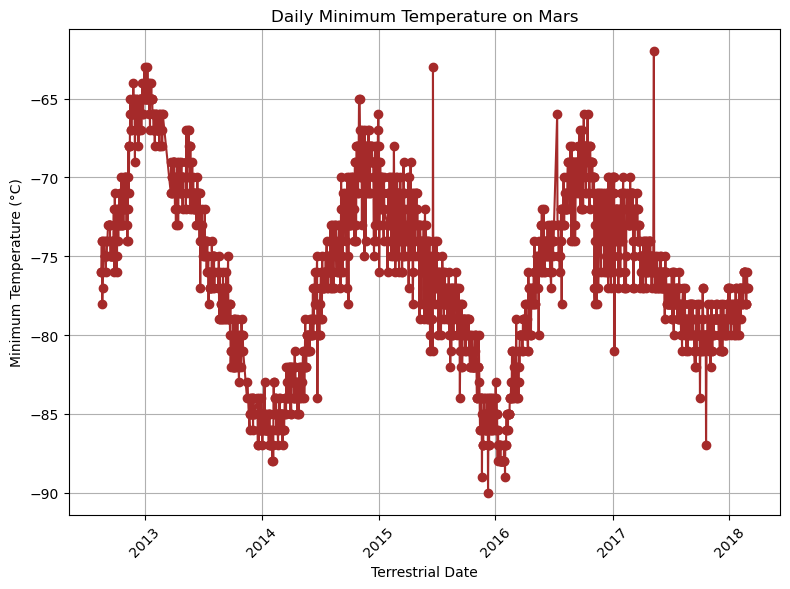

In [81]:
#Visually estimate the result by plotting the daily minimum temperature during one Martian year
# Sort the DataFrame by date
mars_df_sorted = mars_df.sort_values('terrestrial_date')

# Plot the daily minimum temperature against the terrestrial date
plt.figure(figsize=(8, 6))
plt.plot(mars_df_sorted['terrestrial_date'], mars_df_sorted['min_temp'], color='brown', marker='o', linestyle='-')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [82]:
# Write the data to a CSV
csv_filepath = 'mars_data.csv'

# Export the Mars DataFrame to a csv
mars_df.to_csv(csv_filepath, index = False)

In [84]:
browser.quit()